In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib as mpl
from numpy import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['text.usetex'] = True

In [3]:
# "continuous" functions on the circle
N = 360
thetas = np.linspace(-np.pi, np.pi, N)

# amplitude
C = np.ones(N)

# random phase
random.seed(1234)
phi = 2*np.pi*random.rand(N)

# oscillating phase
#N_phi = 18 # number of phase oscillations around the circle
#dTheta_phi = 2*np.pi/N_phi
#phi = 2*np.pi*np.cos(2*np.pi*thetas/dTheta_phi)

# real and imag parts
A = C*np.cos(phi)
B = C*np.sin(phi)

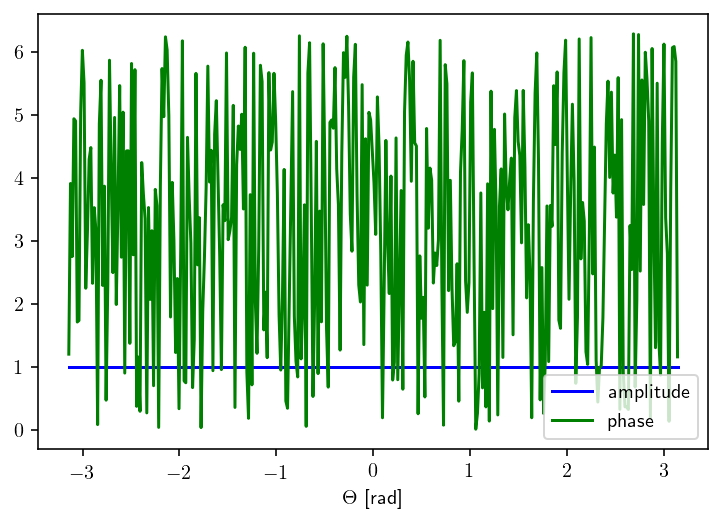

<Figure size 432x288 with 0 Axes>

In [4]:
# plot data
plt.figure()
plt.rc('text', usetex=True)
plt.plot(thetas, C, color='blue', label='amplitude')
plt.plot(thetas, phi, color='green', label='phase')
plt.xlabel('$\Theta$ [rad]')
plt.legend()
plt.show()
plt.savefig('amplitude_phase', bbox_inches='tight', dpi=400)

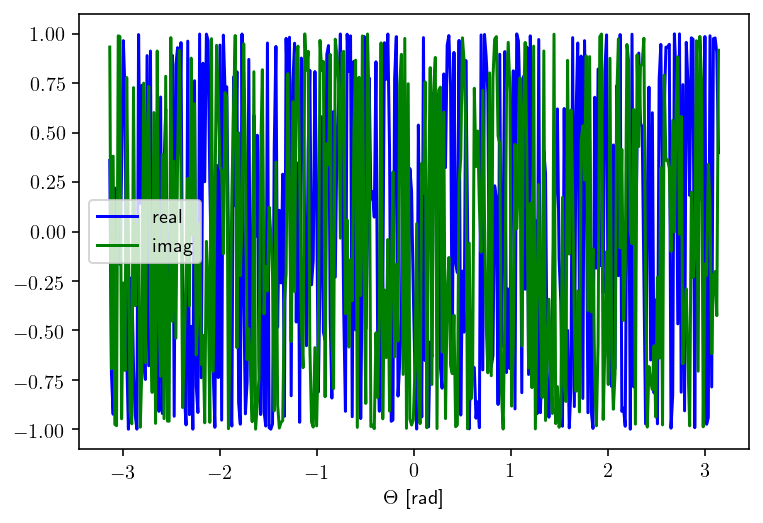

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure()
plt.rc('text', usetex=True)
plt.plot(thetas, A, color='blue', label='real')
plt.plot(thetas, B, color='green', label='imag')
plt.xlabel('$\Theta$ [rad]')
plt.legend()
plt.show()
plt.savefig('real_imag', bbox_inches='tight', dpi=400)

In [6]:
# response function

def apply_response(x, theta0, dTheta_resp, thetas):
    '''
    calculate response which averages together theta values around theta0
    '''
    
    theta_min = theta0 - 0.5*dTheta_resp
    theta_max = theta0 + 0.5*dTheta_resp
    
    ndx = np.where((theta_min <= thetas) & (thetas <= theta_max))
    y = np.mean(x[ndx[0]])
    
    return y

In [7]:
# apply response around circle to get measured data
N_d = 90
dTheta_d = 2*np.pi/N_d

A_d = np.zeros(N_d)
B_d = np.zeros(N_d)
C_d = np.zeros(N_d)
thetas_d = np.zeros(N_d)
for ii in range(N_d):
    
    theta_i = -np.pi + ii*dTheta_d
    thetas_d[ii] = theta_i
    A_d[ii] = apply_response(A, theta_i, dTheta_d, thetas)
    B_d[ii] = apply_response(B, theta_i, dTheta_d, thetas)
    C_d[ii] = apply_response(C, theta_i, dTheta_d, thetas)



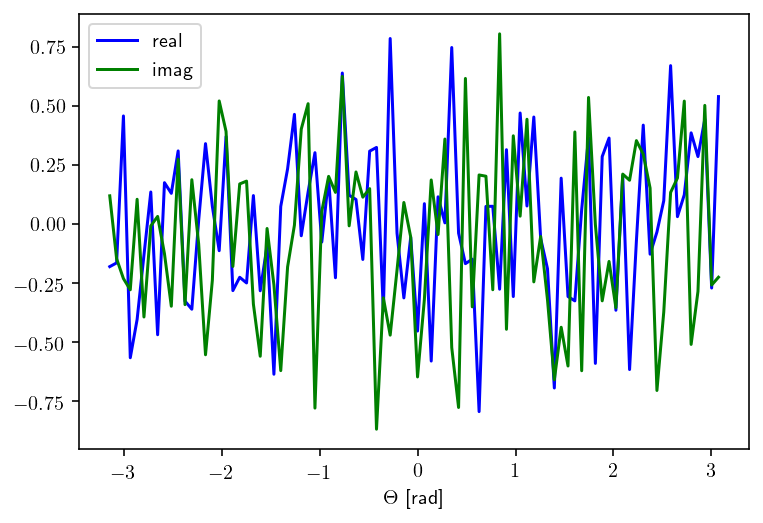

<Figure size 432x288 with 0 Axes>

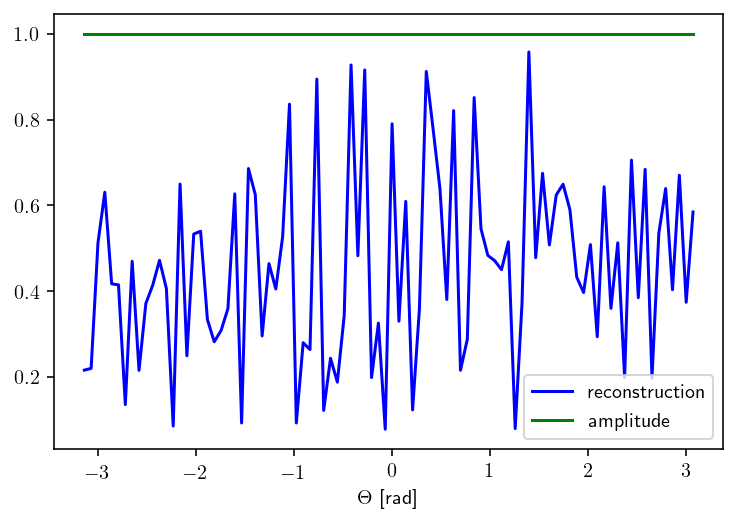

<Figure size 432x288 with 0 Axes>

In [8]:
# plot measureed data
plt.figure()
plt.rc('text', usetex=True)
plt.plot(thetas_d, A_d, color='blue', label='real')
plt.plot(thetas_d, B_d, color='green', label='imag')
plt.xlabel('$\Theta$ [rad]')
plt.legend()
plt.show()
plt.savefig('real_imag_reconstruction', bbox_inches='tight', dpi=400)

plt.figure()
plt.rc('text', usetex=True)
plt.plot(thetas_d, np.sqrt(A_d**2 + B_d**2), color='b', label='reconstruction')
plt.plot(thetas_d, C_d, color='g', label='amplitude')
plt.xlabel('$\Theta$ [rad]')
plt.legend()
plt.show()
plt.savefig('amplitude_reconstruction', bbox_inches='tight', dpi=400)